In [1]:
# Imports
import torch
torch.cuda.empty_cache()

import hr_dv2.transform as tr
from hr_dv2.utils import *
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


IMG_SIZE = 224 * 2
PATCH_SIZE  = 14
PATCH_H, PATCH_W = IMG_SIZE // PATCH_SIZE, IMG_SIZE // PATCH_SIZE
FEAT_DIM = 384

transform = tr.get_input_transform(IMG_SIZE, IMG_SIZE)

In [2]:
from hr_dv2 import HighResDV2

net = HighResDV2("dinov2_vits14_reg", 4, dtype=torch.float16)
net.cuda()
net.eval()
pass

Using cache found in /home/ronan/.cache/torch/hub/facebookresearch_dinov2_main
/home/ronan/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/home/ronan/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/home/ronan/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:33: UserWarning: xFormers is available (Block)
  warnings.warn("xFormers is available (Block)")


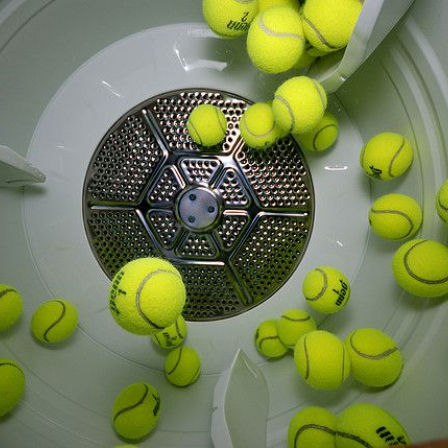

In [3]:
tensor, img = tr.load_image("data/balls.jpeg", transform)
tensor.to(torch.float16)
tensor = tensor.cuda()
img

In [4]:
shift_dists = [i for i in range(1, 3)]
fwd_shift, inv_shift = tr.get_shift_transforms(shift_dists, 'Moore')
net.set_transforms([], [])

#_ = net.get_dv2_features(tensor.unsqueeze(0), 14)
feats_attn_tensor = net.forward(tensor, attn_choice="q")
feats_attn_tensor.shape

torch.Size([1, 11886, 6])


torch.Size([1, 390, 448, 448])

In [5]:
feats_attn = tr.to_numpy(feats_attn_tensor)
feats, attn = feats_attn[:-6], feats_attn[-6:]

In [6]:
print(attn.shape)

(6, 448, 448)


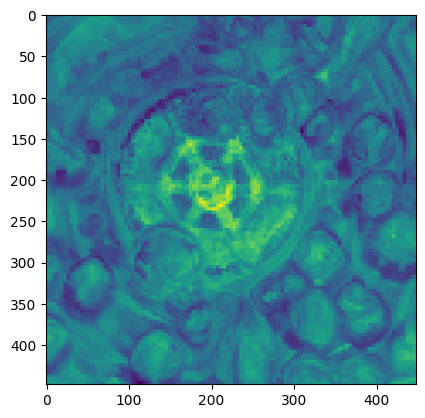

In [7]:
plt.imshow(np.sum(attn, axis=0))